In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [32]:
data=pd.read_csv("/content/drive/MyDrive/Articate/possum.csv")

In [33]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [34]:
data_arr=data.values

print(data_arr.shape)

(104, 14)


<ipython-input-35-0034947e395a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

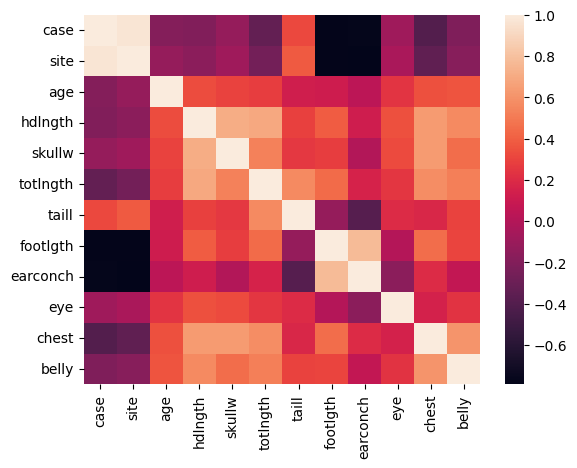

In [35]:
df=pd.read_csv("/content/drive/MyDrive/tr1/possum.csv")
df.describe()
correlation=df.corr()
sb.heatmap(correlation)

In [36]:
varlist=['Pop','sex']

In [37]:
def binary_map(x):
  return x.map({'Vic':1 , "other":0 ,'m':1 ,'f':0})

In [38]:
df[varlist]=df[varlist].apply(binary_map)

In [39]:
df.head(100)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,1,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,0,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,0,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,0,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,0,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,0,1,4,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0
96,97,7,0,1,3,91.0,53.1,86.0,38.0,63.8,46.0,14.5,25.0,31.5
97,98,7,0,1,5,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
98,99,7,0,0,3,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0


In [40]:
y=df['sex'].to_numpy()
y=y.reshape(-1,1)
print(y.shape)

(104, 1)


In [41]:
x=df.drop(['sex'],axis=1).to_numpy()
print(x.shape)

(104, 13)


In [42]:
np.random.seed(0)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
x_nrm=scaler.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=5,verbose=1,restore_best_weights=True)

In [47]:
x_train,x_val_test,y_train,y_val_test=train_test_split(x_nrm,y,train_size=0.8)

In [48]:
x_val , x_test ,y_val , y_test=train_test_split(x_val_test , y_val_test ,test_size=0.2)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
mdl=Sequential()
mdl.add(Dense(units=8 , activation='relu'))
mdl.add(Dense(4,'relu'))
mdl.add(Dense(1,'linear'))
mdl.compile(optimizer='adam',loss='mse',metrics='accuracy')

In [50]:
results=mdl.fit(x_train,y_train,epochs=180,validation_data=(x_val , y_val),callbacks=early_stopping)

Epoch 1/180
3/3 [==============================] - 2s 158ms/step - loss: 0.7418 - accuracy: 0.3735 - val_loss: 0.8826 - val_accuracy: 0.3750
Epoch 2/180
3/3 [==============================] - 0s 29ms/step - loss: 0.7118 - accuracy: 0.3735 - val_loss: 0.8509 - val_accuracy: 0.3750
Epoch 3/180
3/3 [==============================] - 0s 38ms/step - loss: 0.6808 - accuracy: 0.3735 - val_loss: 0.8214 - val_accuracy: 0.3750
Epoch 4/180
3/3 [==============================] - 0s 32ms/step - loss: 0.6522 - accuracy: 0.3735 - val_loss: 0.7933 - val_accuracy: 0.3750
Epoch 5/180
3/3 [==============================] - 0s 48ms/step - loss: 0.6250 - accuracy: 0.3614 - val_loss: 0.7658 - val_accuracy: 0.3750
Epoch 6/180
3/3 [==============================] - 0s 35ms/step - loss: 0.6017 - accuracy: 0.3614 - val_loss: 0.7394 - val_accuracy: 0.3750
Epoch 7/180
3/3 [==============================] - 0s 34ms/step - loss: 0.5804 - accuracy: 0.3735 - val_loss: 0.7182 - val_accuracy: 0.3750
Epoch 8/180
3/3 [==

In [51]:
y_test_prd=mdl.predict(x_test)

1/1 [==============================] - 0s 78ms/step


In [52]:
train_loss=results.history['loss']
val_loss=results.history['val_loss']

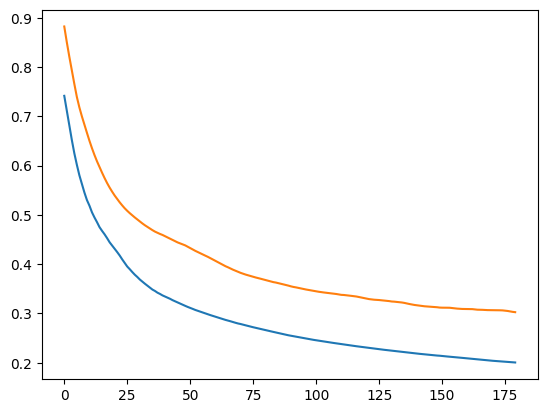

In [53]:
plt.plot(train_loss)
plt.plot(val_loss)

In [54]:
from sklearn.metrics import mean_squared_error as mse 


In [55]:
print(mse(y_test , y_test_prd))

0.09701244743895251


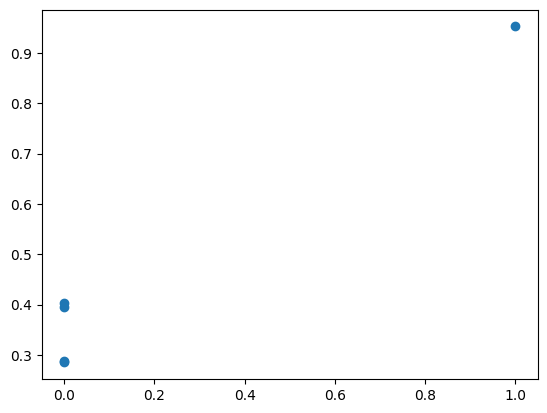

In [56]:
plt.plot(y_test , y_test_prd , 'o')